# Reusable RDD File for all Clinical Trial Years
This notebook is fully rerunnable using the datasets for Clinical Trials from 2023, 2021 and 2020. <br>
The first section ("Unzip file in UNIX and move to DBFS") will remove existing clinical trials .zip and .csv files from DBFS and the /tmp/ folders. <br>
In the "Data Preprocessing" section, please specify the year for the analysis by changing the <b> "year" </b> variable in cell "Cmd 13". This section will complete the preprocessing on the chosen dataset, then will save a cleaned copy as .csv for use in the DataFrame and SQL notebooks. <br>
Cell "Cmd 33" in the Data Preprocessing section will repeat the preprocessing steps for the two years that were not chosen under the <b> "year" </b> variable and save these as cleaned .csv files as well, so that they can be used in the DataFrame and SQL notebooks too without needing to run the RDD notebook separately every time the year of analysis is changed.

#### Unzip file in UNIX and move to DBFS
These steps will remove existing .zip and .csv files from DBFS and the /tmp/ folders. <br>
Please note these initial steps will also remove the cleaned .csv files that are saved to DBFS after Data Preprocessing, for use in the DataFrame and SQL notebooks. <br>
The cleaned .csv files can be recreated by running the Data Preprocessing cells below.

In [0]:
# in next UNIX shell block, remove existing files for notebook to create again

In [0]:
%sh
rm -r /tmp/clinicaltrial_2023.csv
rm /tmp/clinicaltrial_2023.zip
rm -r /tmp/clinicaltrial_2021.csv
rm /tmp/clinicaltrial_2021.zip
rm -r /tmp/clinicaltrial_2020,csv
rm /tmp/clinicaltrial_2020.zip

rm: cannot remove '/tmp/clinicaltrial_2023.csv': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2023.zip': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2021.csv': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2021.zip': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2020,csv': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2020.zip': No such file or directory


In [0]:
# clean DBFS of files that the notebook needs to create again
year_list = ["2020", "2021", "2023"]
for year in year_list:
    dbutils.fs.rm(f"/FileStore/tables/clinicaltrial_{year}", True)
    dbutils.fs.rm(f"/FileStore/tables/clinicaltrial_{year}.csv", True)
dbutils.fs.rm("/FileStore/tables/companies_df.csv", True)

True

In [0]:
# copy zip file to /tmp/ to unzip
for year in year_list:
    dbutils.fs.cp(f"/FileStore/tables/clinicaltrial_{year}.zip", "file:/tmp/")

# in next UNIX shell block, unzip file in /tmp/ folder

In [0]:
%sh
unzip -d /tmp /tmp/clinicaltrial_2023.zip
unzip -d /tmp /tmp/clinicaltrial_2021.zip
unzip -d /tmp /tmp/clinicaltrial_2020.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  


In [0]:
# move unzipped file to DBFS
for year in year_list:
    dbutils.fs.mv(f"file:/tmp/clinicaltrial_{year}.csv", f"FileStore/tables/clinicaltrial_{year}.csv", True)

In [0]:
# display clinicaltrial_year.csv files in DBFS
dbutils.fs.ls(f"FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709126517000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710944683000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706705270000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714471682000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=171138018

## Data Preprocessing
Please specify the year for analysis by changing the <b> "year" </b> variable in the cell below ("Cmd 13") to 2023, 2021 or 2020. <br>
The Data preprocessing steps will run and then save a cleaned .csv file to DBFS for use in the DataFrame and SQL notebooks. <br>
The end of the Data Preprocessing steps include a cell that will repeat these steps for the 2 years not specified in the <b> "year" </b> variable.

In [0]:
# set year for analysis (from 2020, 2021 or 2023)
year = "2023"

In [0]:
# create RDD from original file
rdd1 = sc.textFile(f"/FileStore/tables/clinicaltrial_{year}.csv")

In [0]:
# number of lines in first RDD
rdd1.count()

483423

In [0]:
# view first two lines for any processing required
rdd1.take(2)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
pip install detect_delimiter

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
# find delimiter of file using detect_delimiter library
from detect_delimiter import detect

print("The found delimiter is:")
delimiter = detect(rdd1.take(1)[0], default='\t')
delimiter

The found delimiter is:


'\t'

In [0]:
# split first RDD by delimiter
rdd2 = rdd1.map(lambda line: line.split(delimiter))

In [0]:
# view first two lines of new RDD
rdd2.take(2)

[['"Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'],
 ['"NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_

In [0]:
# clean commas and quote marks from first and last items
rdd3 = rdd2.map(lambda x: (x[0].strip("\""), *x[1:-1], x[-1].strip(",").strip("\"")))

In [0]:
# view first 3 items of cleaned RDD
rdd3.take(3)

[('Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'),
 ('NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'),
 ('NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

Check length of each item in RDD

In [0]:
# find average length of first 500 items in RDD
total_item_length = 0
for item in rdd3.take(500):
    total_item_length += len(item)
average_item_length = round(total_item_length / 500)
average_item_length

14

In [0]:
# create RDD with index to check for any items with different lengths than the average length
indexed_rdd = rdd3.zipWithIndex()

In [0]:
# function to find different length lines with indices
def find_different_length_items_with_index(rdd, length):
    different_items = []
    for item in rdd.collect():
        if len(item[0]) != length:
            different_items.append(item)
        else:
            continue
    return different_items

In [0]:
# find any items with different lengths with their indices
different_items = find_different_length_items_with_index(indexed_rdd, average_item_length)
different_items

[(('NCT00146315',
   'ESCAP: Supervised Exercise for Patients With Coronary Heart Disease in the Primary Care Setting',
   '',
   'COMPLETED',
   'Coronary Heart Disease',
   'BEHAVIORAL: Supervised exercise on a stationary bicycle, 3-5 days a week|BEHAVIORAL: Secondary prevention program for coronary heart disease',
   'Basque Health Service',
   'Preventive Services and Health Promotion Research Network|Castilla-La Mancha Health Service|Castilla-León Health Service|Dalt Sant Joan primary care center (Balears Islans Health Service)|Public Health Service of C'),
  293056),
 (('taluña|Public Health Service of Madrid|Public Health Service of Galicia|Cantabria Health Service',
   '97.0',
   'OTHER_GOV',
   'INTERVENTIONAL',
   'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
   '2005-01',
   '2010-06'),
  293057)]

In [0]:
# function for finding any items that should be merged together
def find_and_merge_items(item_list_with_indices, required_item_length):
    # check if item lengths are equal to the average item length plus 1 (due to both items sharing field, adding 1 to total item length)
    if (len(item_list_with_indices[0][0]) + len(item_list_with_indices[1][0])) != (required_item_length + 1):
        print("The items do not have lengths equal to the average item length plus 1")
    else:
    # check if the different items have consecutive indices, merge together if yes
        i = 0
        while i < (len(item_list_with_indices)-1):
            if item_list_with_indices[i+1][-1]-(item_list_with_indices[i][-1]) == 1:
                # merge items together and remove their indices
                merged_items_no_index = item_list_with_indices[i][0] + item_list_with_indices[i+1][0]
                return merged_items_no_index
            i += 1

In [0]:
# if there are different length items, merge them together and add to main RDD
if len(different_items) == 0:
    print(f"{year} RDD contains no items with different length, final_rdd variable created")
    final_rdd = rdd3
else:
    # form tuple of any items to be merged
    merged_tuple = find_and_merge_items(different_items, average_item_length)

    # merge the shared value in tuple to create new item with same length as average length in RDD
    new_item = [*merged_tuple[0:7], merged_tuple[7] + merged_tuple[8], *merged_tuple[9:]]

    # create RDD from the new item
    new_item_rdd = sc.parallelize(new_item, 1).glom()

    # remove the different length items from indexed RDD
    filtered_indexed_rdd = indexed_rdd.filter(lambda x: (x[1] != different_items[0][1] and x[1] != different_items[1][1]))

    # remove index from indexed RDD
    filtered_rdd = filtered_indexed_rdd.map(lambda x: x[0])

    # add the new item to the filtered RDD
    final_rdd = filtered_rdd.union(new_item_rdd)
    print(f"{len(different_items)} items with different length were found, merged into one item and added to {year} RDD. final_rdd variable created")

2 items with different length were found, merged into one item and added to 2023 RDD. final_rdd variable created


In [0]:
final_rdd.take(5)

[('Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'),
 ('NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'),
 ('NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

In [0]:
# save RDD as csv file for use in DF and SQL notebooks
df = final_rdd.toDF()
df.write.mode("overwrite").csv(f"/FileStore/tables/df_{year}.csv")

- Repeat the above preprocessing steps for the 2 years not specified in the <b> "year" </b> variable
- The <b> "year" </b> variable will still be used for the analysis steps in the remainder of this notebook

In [0]:
# repeat above preprocessing steps for the other 2 years, to create csv files for use in DF and SQL notebooks
year_list.remove(year)

rdd_1 = sc.textFile(f"/FileStore/tables/clinicaltrial_{year_list[0]}.csv")
delimiter_1 = detect(rdd_1.take(1)[0], default='\t')
rdd_2 = rdd_1.map(lambda line: line.split(delimiter_1))
rdd_3 = rdd_2.map(lambda x: (x[0].strip("\""), *x[1:-1], x[-1].strip(",").strip("\"")))
total_item_length_1 = 0
for item in rdd_3.take(500):
    total_item_length_1 += len(item)
average_item_length_1 = round(total_item_length_1 / 500)
indexed_rdd_1 = rdd_3.zipWithIndex()
different_items_1 = find_different_length_items_with_index(indexed_rdd_1, average_item_length_1)
if len(different_items_1) == 0:
    print(f"{year_list[0]} RDD contains no items with different length, final_rdd_1 variable created and saved as .csv.")
    final_rdd_1 = rdd_3
else:
    merged_tuple_1 = find_and_merge_items(different_items_1, average_item_length_1)
    new_item_1 = [*merged_tuple_1[0:7], merged_tuple_1[7] + merged_tuple_1[8], *merged_tuple_1[9:]]
    new_item_rdd_1 = sc.parallelize(new_item_1, 1).glom()
    filtered_indexed_rdd_1 = indexed_rdd_1.filter(lambda x: (x[1] != different_items_1[0][1] and x[1] != different_items_1[1][1]))
    filtered_rdd_1 = filtered_indexed_rdd_1.map(lambda x: x[0])
    final_rdd_1 = filtered_rdd_1.union(new_item_rdd_1)
    print(f"{len(different_items_1)} items with different length were found, merged into one item and added to {year_list[0]} RDD. final_rdd_1 variable created and saved as .csv.")
# save RDD as csv file for use in DF and SQL notebooks
df_1 = final_rdd_1.toDF()
df_1.write.mode("overwrite").csv(f"/FileStore/tables/df_{year_list[0]}.csv")

rdd_1a = sc.textFile(f"/FileStore/tables/clinicaltrial_{year_list[1]}.csv")
delimiter_1a = detect(rdd_1a.take(1)[0], default='\t')
rdd_2a = rdd_1a.map(lambda line: line.split(delimiter_1a))
rdd_3a = rdd_2a.map(lambda x: (x[0].strip("\""), *x[1:-1], x[-1].strip(",").strip("\"")))
total_item_length_1a = 0
for item in rdd_3a.take(500):
    total_item_length_1a += len(item)
average_item_length_1a = round(total_item_length_1a / 500)
indexed_rdd_1a = rdd_3a.zipWithIndex()
different_items_1a = find_different_length_items_with_index(indexed_rdd_1a, average_item_length_1a)
if len(different_items_1a) == 0:
    print(f"{year_list[1]} RDD contains no items with different length, final_rdd_1a variable created and saved as .csv.")
    final_rdd_1a = rdd_3a
else:
    merged_tuple_1a = find_and_merge_items(different_items_1a, average_item_length_1a)
    new_item_1a = [*merged_tuple_1a[0:7], merged_tuple_1a[7] + merged_tuple_1a[8], *merged_tuple_1a[9:]]
    new_item_rdd_1a = sc.parallelize(new_item_1a, 1).glom()
    filtered_indexed_rdd_1a = indexed_rdd_1a.filter(lambda x: (x[1] != different_items_1a[0][1] and x[1] != different_items_1a[1][1]))
    filtered_rdd_1a = filtered_indexed_rdd_1a.map(lambda x: x[0])
    final_rdd_1a = filtered_rdd_1a.union(new_item_rdd_1a)
    print(f"{len(different_items_1a)} items with different length were found, merged into one item and added to {year_list[1]} RDD. final_rdd_1a variable created and saved as .csv.")
# save RDD as csv file for use in DF and SQL notebooks
df_1a = final_rdd_1a.toDF()
df_1a.write.mode("overwrite").csv(f"/FileStore/tables/df_{year_list[1]}.csv")

2020 RDD contains no items with different length, final_rdd_1 variable created and saved as .csv.
2021 RDD contains no items with different length, final_rdd_1a variable created and saved as .csv.


#### Unzip Pharma Dataset

In [0]:
%sh
rm -r /tmp/pharma
rm /tmp/pharma.zip

rm: cannot remove '/tmp/pharma': No such file or directory
rm: cannot remove '/tmp/pharma.zip': No such file or directory


In [0]:
# clean DBFS of pharma files that the notebook needs to create again
dbutils.fs.rm("/FileStore/tables/pharma", True)
dbutils.fs.rm("/FileStore/tables/pharma.csv", True)

True

In [0]:
# copy zip file to /tmp/ to unzip
dbutils.fs.cp(f"/FileStore/tables/pharma.zip", "file:/tmp/")

# in next UNIX shell block, unzip file in /tmp/ folder

True

In [0]:
%sh
unzip -d /tmp /tmp/pharma.zip
ls /tmp

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         
Rserv
RtmpGgAoZb
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
python_lsp_logs
systemd-private-942e55cf9b8445619b950f9ebec20877-systemd-logind.service-QyVlKr
systemd-private-942e55cf9b8445619b950f9ebec20877-systemd-resolved.service-xpNV0o
tmp.3sXYgVcAAa


In [0]:
# move unzipped file to DBFS
dbutils.fs.mv("file:/tmp/pharma.csv", "FileStore/tables/pharma.csv", True)

True

In [0]:
# display DBFS containing pharma files
dbutils.fs.ls(f"FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709126517000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710944683000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706705270000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714471682000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=171138018

### Pharma Dataset Preprocessing
These preprocessing steps only need to be run once for the pharma dataset to be converted to RDD and saved as .csv to DBFS for use in the DataFrame and SQL notebooks.

In [0]:
pharma_file_path = "/FileStore/tables/pharma.csv"

# create RDD from pharma file
pharma_rdd = sc.textFile(pharma_file_path)

In [0]:
pharma_rdd.take(5)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
# split RDD by line delimiter
pharma_rdd2 = pharma_rdd.map(lambda x: x.split("\n"))
pharma_rdd2.take(5)

[['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"'],
 ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company

- each element contains values enclosed in double quote marks (""), then separated by commas
- will use regular expressions to split each element using the double quote marks

In [0]:
# split RDD using regex of double quote marks
import re
pharma_rdd3 = pharma_rdd2.map(lambda x: (re.findall(r'"(.*?)"', x[0])))
pharma_rdd3.take(5)

[['Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'],
 ['Abbott Laboratories',
  'Abbott Laboratories',
  '$5,475,000',
  '$0',
  '$5,475,000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 mil

In [0]:
# unpack element lists
pharma_rdd4 = pharma_rdd3.map(lambda x: (x[0], *x[1:-1], x[-1]))
pharma_rdd4.take(5)

[('Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'),
 ('Abbott Laboratories',
  'Abbott Laboratories',
  '$5,475,000',
  '$0',
  '$5,475,000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 mil

In [0]:
# save RDD as csv file for use in DF and SQL notebooks
from pyspark.sql.types import StringType
companies_df = pharma_rdd4.map(lambda x: x[1]).toDF(StringType())
companies_df.show()
companies_df.write.csv("/FileStore/tables/companies_df.csv")

+--------------------+
|               value|
+--------------------+
|      Parent_Company|
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
| Abbott Laboratories|
|   Johnson & Johnson|
| Abbott Laboratories|
| Abbott Laboratories|
|   Johnson & Johnson|
|   Johnson & Johnson|
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
|              Pfizer|
|              Pfizer|
|Bristol-Myers Squibb|
|               Amgen|
|               Amgen|
|               Amgen|
|Amneal Pharmaceut...|
+--------------------+
only showing top 20 rows



### Question 1
How many distinct studies are in the dataset?

In [0]:
# create RDD of Id only
id_rdd = final_rdd.map(lambda x: x[0])
id_rdd.take(5)

['Id', 'NCT03630471', 'NCT05992571', 'NCT00237471', 'NCT03820271']

In [0]:
# filter out the 'Id' header value
id_rdd2 = id_rdd.filter(lambda x: x != 'Id')
id_rdd2.take(5)

['NCT03630471', 'NCT05992571', 'NCT00237471', 'NCT03820271', 'NCT06229171']

In [0]:
# pair rdd of id column
id_pair_rdd = id_rdd2.map(lambda x: (x, 1))
id_pair_rdd.take(5)

[('NCT03630471', 1),
 ('NCT05992571', 1),
 ('NCT00237471', 1),
 ('NCT03820271', 1),
 ('NCT06229171', 1)]

In [0]:
# reduce by key to check for duplicate id numbers
id_rdd_reduced = id_pair_rdd.reduceByKey(lambda a, b: a + b)
id_rdd_reduced.take(5)

[('NCT02633371', 1),
 ('NCT04784871', 1),
 ('NCT05900271', 1),
 ('NCT05807971', 1),
 ('NCT02083471', 1)]

In [0]:
# number of unique IDs in RDD
id_rdd_reduced.count()

483421

In [0]:
# double check number of unique IDs in RDD
distinct_id_rdd = id_rdd2.distinct()
distinct_id_rdd.count()

483421

In [0]:
# print answer to Question 1
print("The number of studies in the dataset is: " + str(id_rdd_reduced.count()))

The number of studies in the dataset is: 483421


### Question 2
List all types contained in the "Type" column with their frequencies, ordered from most frequent to least frequent

In [0]:
# find index of "Type" column in header row, then create RDD of "Type" values only
type_col_num = final_rdd.take(1)[0].index("Type")
type_rdd = final_rdd.map(lambda x: x[type_col_num])
type_rdd.take(5)

['Type',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL']

In [0]:
# filter out the "Type" header value
type_rdd2 = type_rdd.filter(lambda x: x != 'Type')

In [0]:
# check how many distinct types there are
distinct_types = type_rdd2.distinct()
distinct_types.collect()

['', 'OBSERVATIONAL', 'EXPANDED_ACCESS', 'INTERVENTIONAL']

In [0]:
# replace missing values with "NO TYPE"
def replace_missing_types(value):
    if value == '':
        value = "NO TYPE"
    return value

type_rdd3 = type_rdd2.map(replace_missing_types)

In [0]:
# pair RDD of type column
type_pair_rdd= type_rdd3.map(lambda x: (x, 1))
type_pair_rdd.take(5)

[('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1)]

In [0]:
# reduce by key to count frequency of each type
type_rdd_reduced = type_pair_rdd.reduceByKey(lambda a, b: a + b)
type_rdd_reduced.collect()

[('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928),
 ('NO TYPE', 889),
 ('INTERVENTIONAL', 371383)]

In [0]:
# reverse the pair RDD
type_rdd_reduced_reversed = type_rdd_reduced.map(lambda pair: (pair[1], pair[0]))
type_rdd_reduced_reversed.collect()

[(110221, 'OBSERVATIONAL'),
 (928, 'EXPANDED_ACCESS'),
 (889, 'NO TYPE'),
 (371383, 'INTERVENTIONAL')]

In [0]:
# sort by frequency of each type, then reverse RDD to display answer to Question 2
final_type_rdd = type_rdd_reduced_reversed.sortByKey(False).map(lambda pair: (pair[1], pair[0]))
final_type_rdd.collect()

[('INTERVENTIONAL', 371383),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928),
 ('NO TYPE', 889)]

### Question 3
List the top 5 conditions (from Conditions) with their frequencies.

In [0]:
# find index of "Conditions" column in header row, then create RDD of "Conditions" values only
conditions_col_num = final_rdd.take(1)[0].index("Conditions")
conditions_rdd = final_rdd.map(lambda x: x[conditions_col_num])
conditions_rdd.take(5)

['Conditions',
 'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
 'Cerebrovascular Function|Cognition',
 'Myocardial Infarct|Hyperglycemia',
 'Decompensated Cirrhosis|Liver Transplantation']

In [0]:
# filter out the 'Conditions' header value and any rows with "Conditions" listed instead of specific conditions
conditions_rdd2 = conditions_rdd.filter(lambda x: x != 'Conditions')
conditions_rdd2.take(5)

['Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
 'Cerebrovascular Function|Cognition',
 'Myocardial Infarct|Hyperglycemia',
 'Decompensated Cirrhosis|Liver Transplantation',
 'Hypertension|Treatment Adherence and Compliance|Digital Health']

In [0]:
# function for finding delimiter of RDD items over set character length
def find_delim_long_rdd_items(rdd, num_rdd_items, char_length):
    delimiter_list = []
    for item in rdd.take(num_rdd_items):
        if len(item) >= char_length:
            delimiter = detect(item)
            delimiter_list.append(delimiter)
        else:
            continue
    return delimiter_list

In [0]:
# find list of potential delimiters for Conditions RDD
delimiter_list = find_delim_long_rdd_items(conditions_rdd2, 500, 50)

In [0]:
# function to find most common delimiter in the list of delimiters, for use as delimiter in RDD item
def find_best_delimiter_from_list(delim_list):
    unique_delims = []
    for delim in delim_list:
        if delim not in unique_delims:
            unique_delims.append(delim)

    delim_counts = {}
    for delim in unique_delims:
        delim_counts[delim] = delim_list.count(delim)

    delimiter = [i for i in delim_counts if delim_counts[i]==max(delim_counts.values())]
    return delimiter[0]

In [0]:
# use function to find best delimiter for the conditions RDD
conditions_delim = find_best_delimiter_from_list(delimiter_list)
conditions_delim

'|'

In [0]:
# split conditions RDD using best delimiter
conditions_split_rdd = conditions_rdd2.map(lambda x: x.split(conditions_delim))
conditions_split_rdd.take(5)

[['Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)'],
 ['Cerebrovascular Function', 'Cognition'],
 ['Myocardial Infarct', 'Hyperglycemia'],
 ['Decompensated Cirrhosis', 'Liver Transplantation'],
 ['Hypertension', 'Treatment Adherence and Compliance', 'Digital Health']]

In [0]:
# unpack all lists of conditions
condition_rdd_flat = conditions_split_rdd.flatMap(lambda x: (*x,))
condition_rdd_flat.take(10)

['Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
 'Cerebrovascular Function',
 'Cognition',
 'Myocardial Infarct',
 'Hyperglycemia',
 'Decompensated Cirrhosis',
 'Liver Transplantation',
 'Hypertension',
 'Treatment Adherence and Compliance',
 'Digital Health']

In [0]:
# remove items with no conditions listed
conditions_rdd_filtered = condition_rdd_flat.filter(lambda x: x != '')
conditions_rdd_filtered.take(5)

['Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
 'Cerebrovascular Function',
 'Cognition',
 'Myocardial Infarct',
 'Hyperglycemia']

In [0]:
# pair RDD of conditions
condition_pair_rdd = conditions_rdd_filtered.map(lambda x: (x,1))
condition_pair_rdd.take(10)

[('Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  1),
 ('Cerebrovascular Function', 1),
 ('Cognition', 1),
 ('Myocardial Infarct', 1),
 ('Hyperglycemia', 1),
 ('Decompensated Cirrhosis', 1),
 ('Liver Transplantation', 1),
 ('Hypertension', 1),
 ('Treatment Adherence and Compliance', 1),
 ('Digital Health', 1)]

In [0]:
# reduce by key to find totals for each condition
reduced_condition_rdd = condition_pair_rdd.reduceByKey(lambda a, b: a + b)
reduced_condition_rdd.take(10)

[('Wellbeing', 24),
 ('Quality of Life', 1816),
 ('Motor Skills', 7),
 ('Autoimmune Diseases', 209),
 ('Unspecified Childhood Solid Tumor"," Protocol Specific', 88),
 ('Colorectal Cancer', 2931),
 ('Lymph Node Metastasis', 30),
 ('Renal Colic', 51),
 ('Testicular Germ Cell Tumor', 76),
 ('Cardiovascular Diseases', 2632)]

In [0]:
# reverse pair rdd so it can be sorted
reduced_condition_rdd2 = reduced_condition_rdd.map(lambda pair: (pair[1], pair[0]))
reduced_condition_rdd2.take(10)

[(24, 'Wellbeing'),
 (1816, 'Quality of Life'),
 (7, 'Motor Skills'),
 (209, 'Autoimmune Diseases'),
 (88, 'Unspecified Childhood Solid Tumor"," Protocol Specific'),
 (2931, 'Colorectal Cancer'),
 (30, 'Lymph Node Metastasis'),
 (51, 'Renal Colic'),
 (76, 'Testicular Germ Cell Tumor'),
 (2632, 'Cardiovascular Diseases')]

In [0]:
# sort by descending frequency and reverse pair RDD so condition is first and display list of the top 5 conditions (from Conditions) with their frequencies
sorted_condition_rdd = reduced_condition_rdd2.sortByKey(False).map(lambda pair: (pair[1], pair[0]))
sorted_condition_rdd.take(5)

[('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4071),
 ('Hypertension', 4020)]

### Question 4
Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Assume that the pharma.csv dataset column "Parent Company" contains all possible pharmaceutical companies.

In [0]:
# create RDD of pharma companies
companies_rdd = pharma_rdd4.map(lambda x: x[1]).distinct()
companies_rdd.count()

73

In [0]:
# find index of "Sponsor" column in header row, then create RDD of "Type" values only
sponsor_col_num = final_rdd.take(1)[0].index("Sponsor")
sponsors_rdd = final_rdd.map(lambda x: x[sponsor_col_num])
sponsors_rdd.take(5)

['Sponsor',
 'Sangath',
 'McMaster University',
 'Melbourne Health',
 'Assistance Publique - Hôpitaux de Paris']

In [0]:
# remove 'Sponsor' header
sponsors_rdd2 = sponsors_rdd.filter(lambda x: x != 'Sponsor')

In [0]:
# convert companies rdd to list
list_of_companies = companies_rdd.collect()

In [0]:
# filter sponsors that appear in the list of pharmaceutical companies
sponsors_rdd3 = sponsors_rdd2.filter(lambda x: x not in list_of_companies)
sponsors_rdd3.count()

465039

In [0]:
# create pair RDD for sponsors
sponsors_pair_rdd = sponsors_rdd3.map(lambda x: (x,1))
sponsors_pair_rdd.take(10)

[('Sangath', 1),
 ('McMaster University', 1),
 ('Melbourne Health', 1),
 ('Assistance Publique - Hôpitaux de Paris', 1),
 ('Istituto Auxologico Italiano', 1),
 ('University of Oregon', 1),
 ('Medical University of South Carolina', 1),
 ('Johns Hopkins University', 1),
 ('University of Manitoba', 1),
 ('M.D. Anderson Cancer Center', 1)]

In [0]:
# reduce by key to count frequency of each sponsor
sponsors_reduced_rdd = sponsors_pair_rdd.reduceByKey(lambda a, b: a + b)
sponsors_reduced_rdd.take(10)

[('University of Manitoba', 496),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('The First Affiliated Hospital with Nanjing Medical University', 303),
 ('Hôpital NOVO', 49),
 ('Medical University of Graz', 396),
 ('Near East University"," Turkey', 23),
 ('Hospital Italiano de Buenos Aires', 105),
 ('EBG MedAustron GmbH', 5),
 ('Royal Marsden NHS Foundation Trust', 246),
 ('Wolfram Schummer", MD," PhD', 1)]

In [0]:
# reverse pair RDD to sort by key in order of number of studies
sponsors_reduced_rdd2 = sponsors_reduced_rdd.map(lambda pair: (pair[1], pair[0]))
sorted_sponsors_reduced_rdd = sponsors_reduced_rdd2.sortByKey(False).map(lambda pair: (pair[1], pair[0]))

In [0]:
# view 10 most common sponsors that are not pharmaceutical companies, in descending order of number of studies
sorted_sponsors_reduced_rdd.take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

### Question 5
Plot number of completed studies for each month in 2023. Include visualisation as well as table of values

In [0]:
# find index of "Status" column in header row, then create RDD of distinct "Status" values
status_col_num = final_rdd.take(1)[0].index("Status")
distinct_status_rdd = final_rdd.map(lambda x: x[status_col_num]).distinct()
distinct_status_rdd.collect()

['NO_LONGER_AVAILABLE',
 'AVAILABLE',
 'TERMINATED',
 'TEMPORARILY_NOT_AVAILABLE',
 'NOT_YET_RECRUITING',
 'UNKNOWN',
 'WITHDRAWN',
 'ENROLLING_BY_INVITATION',
 'RECRUITING',
 'SUSPENDED',
 'APPROVED_FOR_MARKETING',
 'Status',
 'COMPLETED',
 'ACTIVE_NOT_RECRUITING',
 'WITHHELD']

In [0]:
# filter RDD for completed trials only
completed_trials_rdd = final_rdd.filter(lambda x: "completed" in x[status_col_num].lower())
completed_trials_rdd.take(5)

[('NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'),
 ('NCT02945371',
  'Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life',
  'REV',
  'COMPLETED',
  'Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced',
  'BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training',
  'Universi

In [0]:
# create RDD of completion dates for completed trials only
completed_dates_col_num = final_rdd.take(1)[0].index("Completion")
completed_dates_rdd = completed_trials_rdd.map(lambda x: x[completed_dates_col_num])
completed_dates_rdd.take(10)

['2019-02-28',
 '2016-05',
 '2012-08',
 '2016-06-07',
 '2014-11',
 '2017-05',
 '2011-12',
 '2023-02-24',
 '2016-12',
 '2021-07-31']

In [0]:
# retrieve only dates for selected year
completed_dates_rdd2 = completed_dates_rdd.filter(lambda x: year in x)
completed_dates_rdd2.take(15)

['2023-02-24',
 '2023-04-07',
 '2023-08-27',
 '2023-06-30',
 '2023-08-01',
 '2023-05-02',
 '2023-01-06',
 '2023-07-31',
 '2023-12-08',
 '2023-10-01',
 '2023-01-01',
 '2023-01-01',
 '2023-03-20',
 '2023-06-01',
 '2023-06-06']

In [0]:
# find date format and create RDD of months only (remove days)
if re.search(f'[a-zA-Z]+\s+{year}', completed_dates_rdd2.take(1)[0]):
    completed_date_format = "mmm-yyyy"
    completed_dates_rdd3 = completed_dates_rdd2.map(lambda x: re.findall(f'[a-zA-Z]+\s+{year}', x))
elif re.search(f'{year}-[0-1][0-9]', completed_dates_rdd2.take(1)[0]):
    completed_date_format = "yyyy-mm-dd"
    completed_dates_rdd3 = completed_dates_rdd2.map(lambda x: re.findall(f'{year}-[0-1][0-9]', x))
completed_dates_rdd3.take(10)

[['2023-02'],
 ['2023-04'],
 ['2023-08'],
 ['2023-06'],
 ['2023-08'],
 ['2023-05'],
 ['2023-01'],
 ['2023-07'],
 ['2023-12'],
 ['2023-10']]

In [0]:
# create pair RDD for months
month_pair_rdd = completed_dates_rdd3.map(lambda x: (*x, 1))
month_pair_rdd.take(5)

[('2023-02', 1),
 ('2023-04', 1),
 ('2023-08', 1),
 ('2023-06', 1),
 ('2023-08', 1)]

In [0]:
# reduce pair RDD to give counts for each month
trials_per_month_rdd = month_pair_rdd.reduceByKey(lambda a,b: a+b).sortByKey()
trials_per_month_rdd.take(12)

[('2023-01', 1494),
 ('2023-02', 1272),
 ('2023-03', 1552),
 ('2023-04', 1324),
 ('2023-05', 1415),
 ('2023-06', 1619),
 ('2023-07', 1360),
 ('2023-08', 1230),
 ('2023-09', 1152),
 ('2023-10', 1058),
 ('2023-11', 909),
 ('2023-12', 1082)]

In [0]:
# convert RDD to dictionary for plotting graph
trials_per_month_dict = trials_per_month_rdd.collectAsMap()
trials_per_month_dict

{'2023-01': 1494,
 '2023-02': 1272,
 '2023-03': 1552,
 '2023-04': 1324,
 '2023-05': 1415,
 '2023-06': 1619,
 '2023-07': 1360,
 '2023-08': 1230,
 '2023-09': 1152,
 '2023-10': 1058,
 '2023-11': 909,
 '2023-12': 1082}

In [0]:
# function to rename dictionary keys based on date format
def rename_dates_dict(dict_name, date_format, year):
    try:
        if date_format == "mmm-yyyy":
            # rename dictionary keys from Month/Year to Month only
            dict_name["Jan"] = dict_name.pop(f"Jan {year}")
            dict_name["Feb"] = dict_name.pop(f"Feb {year}")
            dict_name["Mar"] = dict_name.pop(f"Mar {year}")
            dict_name["Apr"] = dict_name.pop(f"Apr {year}")
            dict_name["May"] = dict_name.pop(f"May {year}")
            dict_name["Jun"] = dict_name.pop(f"Jun {year}")
            dict_name["Jul"] = dict_name.pop(f"Jul {year}")
            dict_name["Aug"] = dict_name.pop(f"Aug {year}")
            dict_name["Sep"] = dict_name.pop(f"Sep {year}")
            dict_name["Oct"] = dict_name.pop(f"Oct {year}")
            dict_name["Nov"] = dict_name.pop(f"Nov {year}")
            dict_name["Dec"] = dict_name.pop(f"Dec {year}")
        elif date_format == "yyyy-mm-dd":
            # rename dictionary keys from digits to Month names
            dict_name["Jan"] = dict_name.pop(f"{year}-01")
            dict_name["Feb"] = dict_name.pop(f"{year}-02")
            dict_name["Mar"] = dict_name.pop(f"{year}-03")
            dict_name["Apr"] = dict_name.pop(f"{year}-04")
            dict_name["May"] = dict_name.pop(f"{year}-05")
            dict_name["Jun"] = dict_name.pop(f"{year}-06")
            dict_name["Jul"] = dict_name.pop(f"{year}-07")
            dict_name["Aug"] = dict_name.pop(f"{year}-08")
            dict_name["Sep"] = dict_name.pop(f"{year}-09")
            dict_name["Oct"] = dict_name.pop(f"{year}-10")
            dict_name["Nov"] = dict_name.pop(f"{year}-11")
            dict_name["Dec"] = dict_name.pop(f"{year}-12")
    except:
        pass
    return dict_name

In [0]:
# table showing number of completed studies per month
trials_per_month_dict = rename_dates_dict(trials_per_month_dict, completed_date_format, year)
trials_per_month_dict

{'Jan': 1494,
 'Feb': 1272,
 'Mar': 1552,
 'Apr': 1324,
 'May': 1415,
 'Jun': 1619,
 'Jul': 1360,
 'Aug': 1230,
 'Sep': 1152,
 'Oct': 1058,
 'Nov': 909,
 'Dec': 1082}

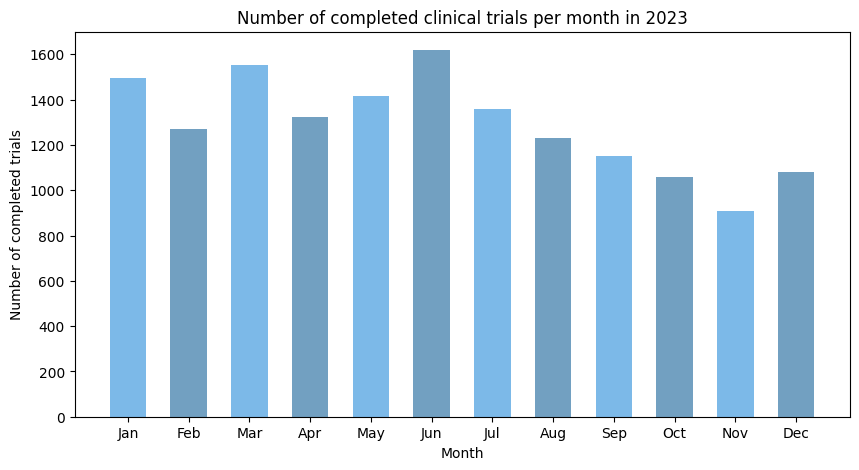

In [0]:
# bar plot for number of completed studies per month
import matplotlib.pyplot as plt

x = trials_per_month_dict.keys()
y = trials_per_month_dict.values()
fig = plt.figure(figsize=(10, 5))

# set colours for bar plot
colours = ["#7CB9E8", "#72A0C1"]

plt.bar(x, y, width=0.6, color = colours)
plt.xlabel("Month")
plt.xticks(fontsize=10)
plt.ylabel("Number of completed trials")
plt.title(f"Number of completed clinical trials per month in {year}")
plt.show()

### Further Analysis 1
The main dataset has each condition listed under its name as it appeared in the trial. <br>
This has resulted in similar conditions being listed separately if the individual trial used different punctuation or a slightly different spelling for the condition. <br>
The multiple instances of cancer-related conditions are affected by this due to the number of distinct cancers that appear in the trials. <br>
How many cancer-related conditions are there and which cancers are covered most frequently in these clinical trials?

In [0]:
# final sorted conditions RDD for comparison
print(f"The top five conditions in the {year} dataset are:")
sorted_condition_rdd.take(5)

The top five conditions in the 2023 dataset are:


[('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4071),
 ('Hypertension', 4020)]

In [0]:
# RDD for cancer-related conditions only
cancer_rdd = conditions_rdd_filtered.filter(lambda x: "cancer" in x.lower())
cancer_rdd.count()

71747

In [0]:
# print answer to how many cancer-related conditions there are in this dataset
print(f"There are {cancer_rdd.count()} instances of cancer-related conditions in the {year} dataset, with {cancer_rdd.distinct().count()} distinct cancer-related conditions.")

There are 71747 instances of cancer-related conditions in the 2023 dataset, with 5495 distinct cancer-related conditions.


In [0]:
# create pair RDD of cancer-related conditions
cancer_count_rdd = cancer_rdd.map(lambda x: (x,1))
cancer_count_rdd.take(5)

[('Kidney Cancer', 1),
 ('Colorectal Cancer', 1),
 ('Cervical Cancer', 1),
 ('Cancer', 1),
 ('Gynecologic Cancer', 1)]

In [0]:
# reduce pair RDD by key to give counts for each distinct cancer
cancer_count_rdd2 = cancer_count_rdd.reduceByKey(lambda a, b: a + b)
cancer_count_rdd3 = cancer_count_rdd2.map(lambda pair: (pair[1], pair[0]))
sorted_cancer_rdd = cancer_count_rdd3.sortByKey(False).map(lambda pair: (pair[1], pair[0]))
sorted_cancer_rdd.take(10)

[('Breast Cancer', 7502),
 ('Prostate Cancer', 3836),
 ('Cancer', 3290),
 ('Colorectal Cancer', 2931),
 ('Lung Cancer', 2713),
 ('Ovarian Cancer', 1736),
 ('Pancreatic Cancer', 1634),
 ('Gastric Cancer', 1531),
 ('Head and Neck Cancer', 1403),
 ('Cervical Cancer', 1098)]

In [0]:
# reverse order of Pair RDD to sort by count for each cancer-related condition
cancer_count_rdd3 = cancer_count_rdd2.map(lambda pair: (pair[1], pair[0]))
sorted_cancer_rdd = cancer_count_rdd3.sortByKey(False).map(lambda pair: (pair[1], pair[0]))

In [0]:
# view 20 most-covered cancer-related conditions in this dataset with their frequencies
sorted_cancer_rdd.take(20)

[('Breast Cancer', 7502),
 ('Prostate Cancer', 3836),
 ('Cancer', 3290),
 ('Colorectal Cancer', 2931),
 ('Lung Cancer', 2713),
 ('Ovarian Cancer', 1736),
 ('Pancreatic Cancer', 1634),
 ('Gastric Cancer', 1531),
 ('Head and Neck Cancer', 1403),
 ('Cervical Cancer', 1098),
 ('Non-small Cell Lung Cancer', 1016),
 ('Bladder Cancer', 928),
 ('Non Small Cell Lung Cancer', 857),
 ('Esophageal Cancer', 857),
 ('Rectal Cancer', 802),
 ('Metastatic Breast Cancer', 784),
 ('Colon Cancer', 691),
 ('Non-Small Cell Lung Cancer', 648),
 ('Endometrial Cancer', 623),
 ('Metastatic Cancer', 582)]